![Logo_Conestoga](https://upload.wikimedia.org/wikipedia/commons/3/34/Conestoga_College_logo.png)

Artificial Intelligence for Business Decisions and Transformation 
&nbsp; 

CSCN8030 - Spring 2024 - Section 2
&nbsp; 

Professor: Glaucia Melo dos Santos, PhD
&nbsp;

Group 4 - Members:<br>

Krishna Kumar, Hemasree<br>
Shijin, Jency<br>
Fernandez, Arcadio<br>

## Sprint 1 Design + Development:

# Project: US Accident Severity Prediction



# 1. Introduction: A brief introduction to the problem, libraries and obtaining the data.

###  1.1. A brief introduction to the problem

**1.1.1. Why this is topic important?**<br>
There were 39,508 fatal motor vehicle crashes in the United States in 2021 in which 42,939 deaths occurred. This resulted in 12.9 deaths per 100,000 people and 1.37 deaths per 100 million miles traveled. The fatality rate per 100,000 people ranged from 5.7 in Rhode Island to 26.2 in Mississippi. The death rate per 100 million miles traveled ranged from 0.71 in Massachusetts to 2.08 in South Carolina.

**1.1.2. How could this project make an impact in society?**<br>
Accident severity modeling helps understand contributing factors and develop preventive strategies. AI models, such as random forest, offer adaptability and higher predictive accuracy compared to traditional statistical models. This study aims to develop a predictive model for traffic accident severity on USA highways ML algorithm.


**1.1.3. Data description**<br>
This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records.For more information about this dataset, please visit Kaggle: [Dataset](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data) 


**1.1.4. Indication of Reference Code**<br>
On Kaggle at US Accidents (2016 - 2023) Dataset, there are 371 codes. Two of them  caught our attention because of its organization and the way the result is exposed:<br>

https://www.kaggle.com/code/jingzongwang/usa-car-accidents-severity-prediction
https://www.kaggle.com/code/satyabrataroy/60-insights-extraction-us-accident-analysis



### 1.2. Importing all the essential libraries and sub modules

In [1]:
pip install geopandas geopy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import geopandas as gpd
import fiona
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix





### 1.3. Obtaining the Data

In [20]:
df_accidents_dataset = pd.read_csv('Data/US_Accidents_Dataset/US_Accidents_March23.csv')

display(df_accidents_dataset)

ID   Source  Severity           Start_Time   
0              A-1  Source2         3  2016-02-08 05:46:00  \
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng   
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN  \
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        NaN   
2        2016-02-08 07:19:27  39.063148  -84.032608       NaN        NaN   
3        2016-02-08 07:53:34  39.747753  -84.205582       NaN        NaN   
4        2016-02-08 08:09:07  39.627781  -84.188354       NaN        NaN   
...                      ...        ...         ...       ...        ...   
7728389  2019-08-23 18:32:01  34.002480 -117.379360  33.99888 -117.37094   
7728390  2019-08-23 19:38:23  32.766960 -117.148060  32.76555 -117.15363   
7728391  2019-08-23 19:28:49  33.775450 -117.847790  33.77740 -117.85727   
7728392  2019-08-23 19:29:42  33.992460 -118.403020  33.98311 -118.39565   
7728393  2019-08-23 19:21:31  34.133930 -117.230920  34.13736 -117.23934   

         Distance(mi)  ... Roundabout Station   Stop Traffic_Calming   
0               0.010  ...      False   False  False           False  \
1               0.010  ...      False   False  False           False   
2               0.010  ...      False   False  False           False   
3               0.010  ...      False   False  False           False   
4               0.010  ...      False   False  False           False   
...               ...  ...        ...     ...    ...             ...   
7728389         0.543  ...      False   False  False           False   
7728390         0.338  ...      False   False  False           False   
7728391         0.561  ...      False   False  False           False   
7728392         0.772  ...      False   False  False           False   
7728393         0.537  ...      False   False  False           False   

        Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight   
0                False        False          Night          Night  \
1                False        False          Night          Night   
2                 True        False          Night          Night   
3                False        False          Night            Day   
4                 True        False            Day            Day   
...                ...          ...            ...            ...   
7728389          False        False            Day            Day   
7728390          False        False            Day            Day   
7728391          False        False            Day            Day   
7728392          False        False            Day            Day   
7728393          False        False            Day            Day   

        Nautical_Twilight Astronomical_Twilight  
0                   Night                 Night  
1                   Night                   Day  
2                     Day                   Day  
3                     Day                   Day  
4                     Day                   Day  
...                   ...                   ...  
7728389               Day                   Day  
7728390               Day                   Day  
7728391               Day                   Day  
7728392               Day                   Day  
7728393               Day                   Day  

[7728394 rows x 46 columns]

# 2. Exploratory data analysis - EDA


- ID: T0001 - Task: Peform statistical analysis, such as counts, averages, and distributions to provide insights into accident frequency, severity, and other relevant factors.
- ID: T0002 - Task: Use Data visualization techniques, such as charts, graphs, and maps to visually explore and communicate patterns or relationships in accident data.

## 2.1. Basic data analysis

In [5]:
# Number of rows and columns
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df_accidents_dataset.shape[0], df_accidents_dataset.shape[1]))

The Dataset Contains, Rows: 7,728,394 & Columns: 46


In [6]:
# `info()` method prints information about the DataFrame. 
df_accidents_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
# `.nunique()` function counts the number of distinct entries in the column, ignoring any NaN values by default.
num_unique_cities = df_accidents_dataset['City'].nunique()

print(f"The number of unique cities is: {num_unique_cities}")

The number of unique cities is: 13678


In [8]:
# `.nunique()` function counts the number of distinct entries in the column, ignoring any NaN values by default.
num_unique_source = df_accidents_dataset['Source'].nunique()

print(f"The number of source is: {num_unique_source}")



The number of source is: 3


In [9]:
# `.nunique()` function counts the number of distinct entries in the column, ignoring any NaN values by default.
num_unique_severity = df_accidents_dataset['Severity'].nunique()

print(f"The number of severity is: {num_unique_severity}")

The number of severity is: 4


## 2.2. Statistical analysis


In [10]:
df_accidents_dataset.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng   
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06  \
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)   
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06  \
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e+00   -8.900000e+01  -8.900000e+01  1.000000e+00   
25%    0.000000e+00    4.900000e+01   4.300000e+01  4.800000e+01   
50%    3.000000e-02    6.400000e+01   6.200000e+01  6.700000e+01   
75%    4.640000e-01    7.600000e+01   7.500000e+01  8.400000e+01   
max    4.417500e+02    2.070000e+02   2.070000e+02  1.000000e+02   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  7.587715e+06    7.551296e+06     7.157161e+06       5.524808e+06  
mean   2.953899e+01    9.090376e+00     7.685490e+00       8.407210e-03  
std    1.006190e+00    2.688316e+00     5.424983e+00       1.102246e-01  
min    0.000000e+00    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.937000e+01    1.000000e+01     4.600000e+00       0.000000e+00  
50%    2.986000e+01    1.000000e+01     7.000000e+00       0.000000e+00  
75%    3.003000e+01    1.000000e+01     1.040000e+01       0.000000e+00  
max    5.863000e+01    1.400000e+02     1.087000e+03       3.647000e+01

## 2.3. City Analysis

In [11]:
#DataFrame to count accident per citye
city_df = pd.DataFrame(df_accidents_dataset['City'].value_counts().reset_index())

# Calculate the total number of accident
total_cases = city_df['count'].sum()

# Create a new column for the percentage of each city's cases relative to the total
city_df['Percentage'] = (city_df['count'] / total_cases) * 100

# Adjust the index to start from 1
city_df.index = pd.RangeIndex(start=1, stop=len(city_df) + 1, step=1)

# Display the DataFrame 
display(city_df.head(20))

City   count  Percentage
1           Miami  186917    2.418654
2         Houston  169609    2.194693
3     Los Angeles  156491    2.024950
4       Charlotte  138652    1.794118
5          Dallas  130939    1.694314
6         Orlando  109733    1.419915
7          Austin   97359    1.259798
8         Raleigh   86079    1.113838
9       Nashville   72930    0.943694
10    Baton Rouge   71588    0.926329
11        Atlanta   68186    0.882308
12     Sacramento   66264    0.857438
13      San Diego   55504    0.718206
14        Phoenix   53974    0.698409
15    Minneapolis   51488    0.666240
16       Richmond   48845    0.632041
17  Oklahoma City   46092    0.596418
18   Jacksonville   42447    0.549252
19         Tucson   39304    0.508583
20       Columbia   38178    0.494013

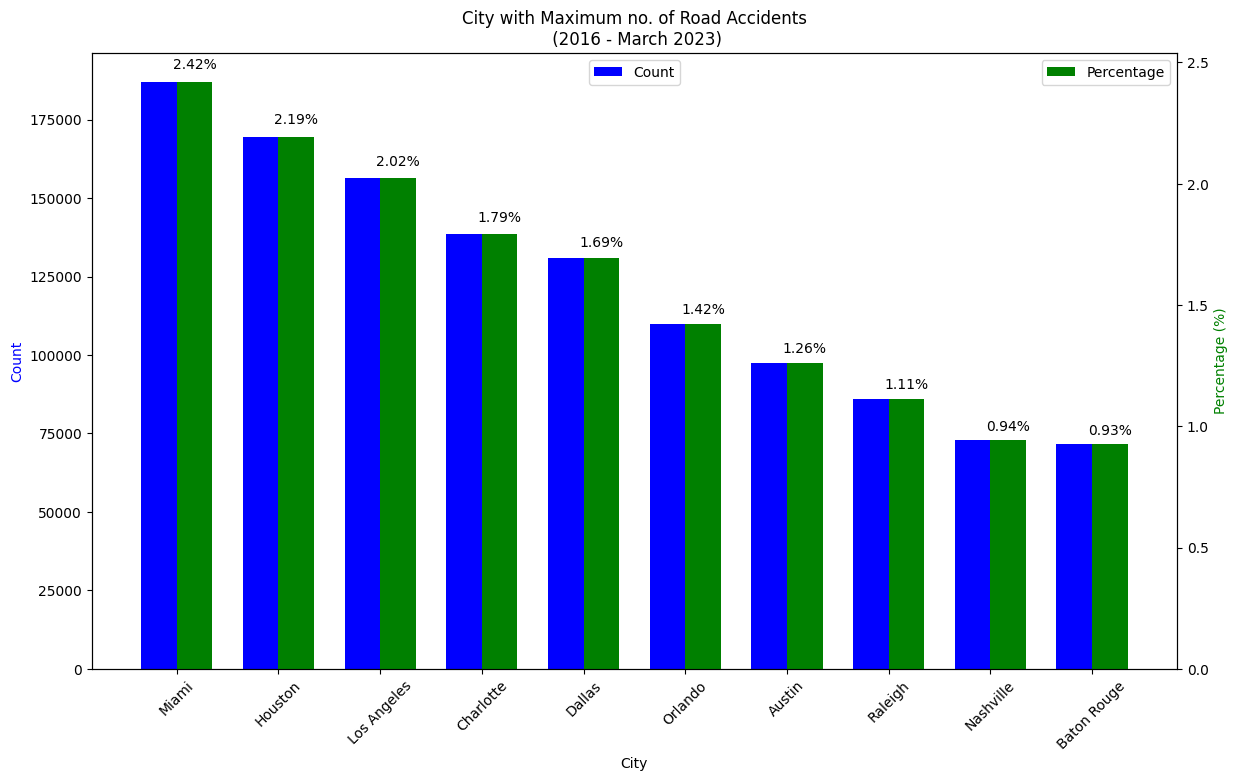

In [12]:
# Data preparation
cities = city_df['City'].head(10)
counts = city_df['count'].head(10)
percentages = city_df['Percentage'].head(10)

# X locations for the groups
x = np.arange(len(cities))

# Plotting
fig, ax1 = plt.figure(figsize=(14, 8)), plt.gca()

# Bar chart for counts
width = 0.35  # the width of the bars
rects1 = ax1.bar(x - width/2, counts, width, label='Count', color='blue')

# Create twin axis for percentage
ax2 = ax1.twinx()  
rects2 = ax2.bar(x + width/2, percentages, width, label='Percentage', color='green')

# Function to add labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        label_position = height + (height * 0.01)  # Adjust position above bar
        ax2.annotate(f'{height:.2f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, label_position),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Adding labels to the percentage bars
add_labels(rects2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('City')
ax1.set_ylabel('Count', color='blue')
ax2.set_ylabel('Percentage (%)', color='green')
ax1.set_title("City with Maximum no. of Road Accidents\n (2016 - March 2023)")
ax1.set_xticks(x)
ax1.set_xticklabels(cities, rotation=45)
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')

# Display the plot
plt.show()


Key Observations:<br>

1. Miami is the city with highest (2.42%) no. of road accidents in US (2016-2020).

2. Houston is the city with 2nd highest (2.19%) no. of road accidents in US (2016-2020).

3. Around 16% accident records of past 7 years are only from these 10 cities out of 13,678 cities in US .

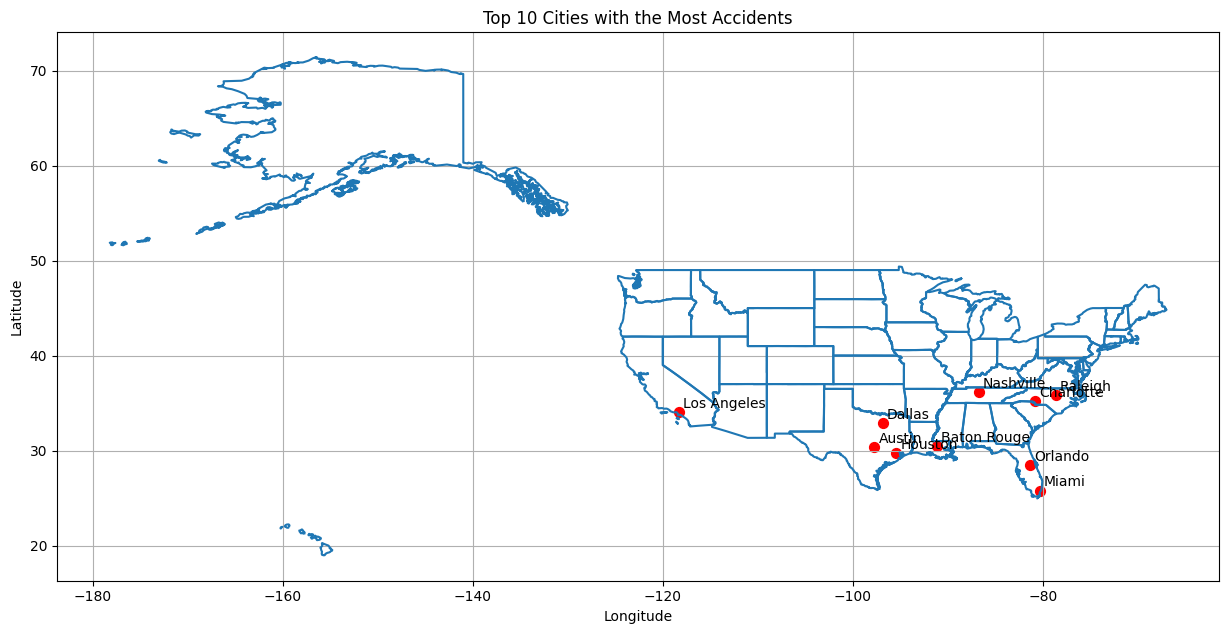

In [13]:
# import geopandas as gpd
# import fiona
# import matplotlib.pyplot as plt
# import pandas as pd

# Assuming city_df contains the aggregated data of top 10 cities
city_df = df_accidents_dataset.groupby('City').size().reset_index(name='count')
city_df = city_df.nlargest(10, 'count')

# Merge with the main dataset to get the longitude and latitude values
top_10_cities = df_accidents_dataset[df_accidents_dataset['City'].isin(city_df['City'])]

# Calculate mean latitude and longitude for each city
geo_data = top_10_cities.groupby('City').agg({
    'Start_Lat': 'mean',
    'Start_Lng': 'mean'
}).reset_index()

# Merge the city_df with geo_data to have complete information
merged_df = pd.merge(city_df, geo_data, on='City')

# Set the environment variable using Fiona's context
with fiona.Env(SHAPE_RESTORE_SHX='YES'):
    try:
        usa = gpd.read_file(r'C:\Users\arcad\Labs_term2\States_shapefile.shp')
    except Exception as e:
        print(f"Error reading shapefile: {e}")

# Convert merged DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['Start_Lng'], merged_df['Start_Lat']))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
usa.boundary.plot(ax=ax)  # Plot USA boundaries
gdf.plot(ax=ax, color='red', markersize=50)  # Plot cities on the map

# Adding city names
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['City']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.title('Top 10 Cities with the Most Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## 2.4. Severity Analysis



<Axes: title={'center': 'Severity Count by Sources'}, xlabel='Source'>

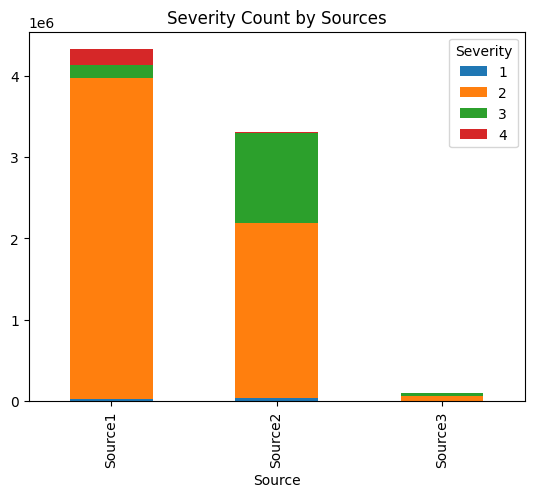

In [14]:
df_source = df_accidents_dataset.groupby(['Severity','Source']).size().reset_index().pivot(\
    columns='Severity', index='Source', values=0)
df_source.plot(kind='bar', stacked=True, title='Severity Count by Sources')

    
# df_source = df.groupby(['Severity','Source']).size().reset_index().pivot(\
#     columns='Severity', index='Source', values=0)
# df_source.plot(kind='bar', stacked=True, title='Severity Count by Sources')



In [15]:
# import pandas as pd

# Assuming df_accidents_dataset is the DataFrame containing the accident data

# Calculate the count of each severity class
severity_counts = df_accidents_dataset['Severity'].value_counts()

# Calculate the total number of entries
total_counts = len(df_accidents_dataset)

# Calculate the percentage for each severity class
severity_percentage = (severity_counts / total_counts) * 100

# Display the result
severity_percentage = severity_percentage.sort_index()
severity_percentage_df = pd.DataFrame({
    'Severity': severity_percentage.index,
    'Percentage': severity_percentage.values
})

print(severity_percentage_df)


   Severity  Percentage
0         1    0.871669
1         2   79.667017
2         3   16.812510
3         4    2.648804


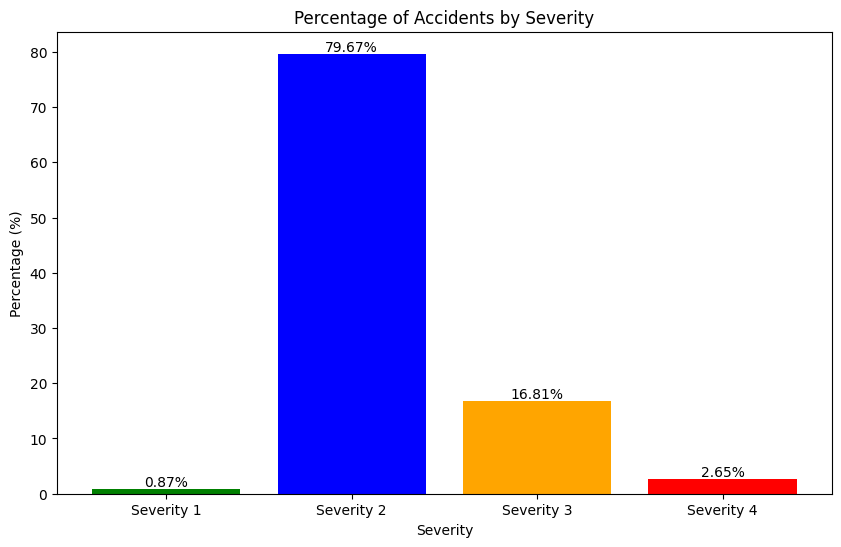

In [16]:
import matplotlib.pyplot as plt

# Assuming severity_percentage_df is the DataFrame containing severity percentages

# Plotting the percentage of each severity class
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(severity_percentage_df['Severity'], severity_percentage_df['Percentage'], color=['green', 'blue', 'orange', 'red'])

# Adding title and labels
plt.title('Percentage of Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Percentage (%)')
plt.xticks(severity_percentage_df['Severity'], ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4'])

# Display the percentage on top of each bar
for index, value in enumerate(severity_percentage_df['Percentage']):
    ax.text(severity_percentage_df['Severity'][index], value + 0.5, f'{value:.2f}%', ha='center')

# Show the plot
plt.show()


Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

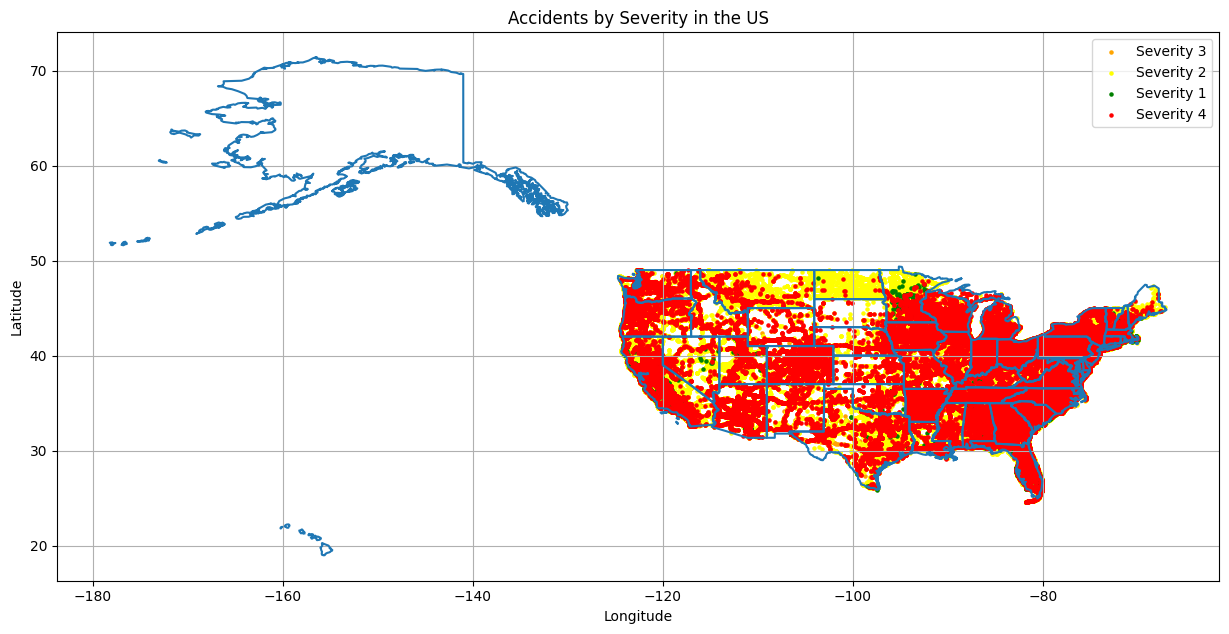

In [17]:
# import geopandas as gpd
# import fiona
# import matplotlib.pyplot as plt
# import pandas as pd



# Filter the necessary columns
df_severity = df_accidents_dataset[['City', 'Start_Lat', 'Start_Lng', 'Severity']]

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df_severity, geometry=gpd.points_from_xy(df_severity['Start_Lng'], df_severity['Start_Lat']))

# Set the environment variable using Fiona's context
with fiona.Env(SHAPE_RESTORE_SHX='YES'):
    try:
        usa = gpd.read_file(r'C:\Users\arcad\Labs_term2\States_shapefile.shp')
    except Exception as e:
        print(f"Error reading shapefile: {e}")

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
usa.boundary.plot(ax=ax)  # Plot USA boundaries

# Plot each severity level with different colors
severity_colors = {1: 'green', 2: 'yellow', 3: 'orange', 4: 'red'}

for severity in gdf['Severity'].unique():
    gdf[gdf['Severity'] == severity].plot(ax=ax, color=severity_colors[severity], markersize=5, label=f'Severity {severity}')

# Adding title and legend
plt.title('Accidents by Severity in the US')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()


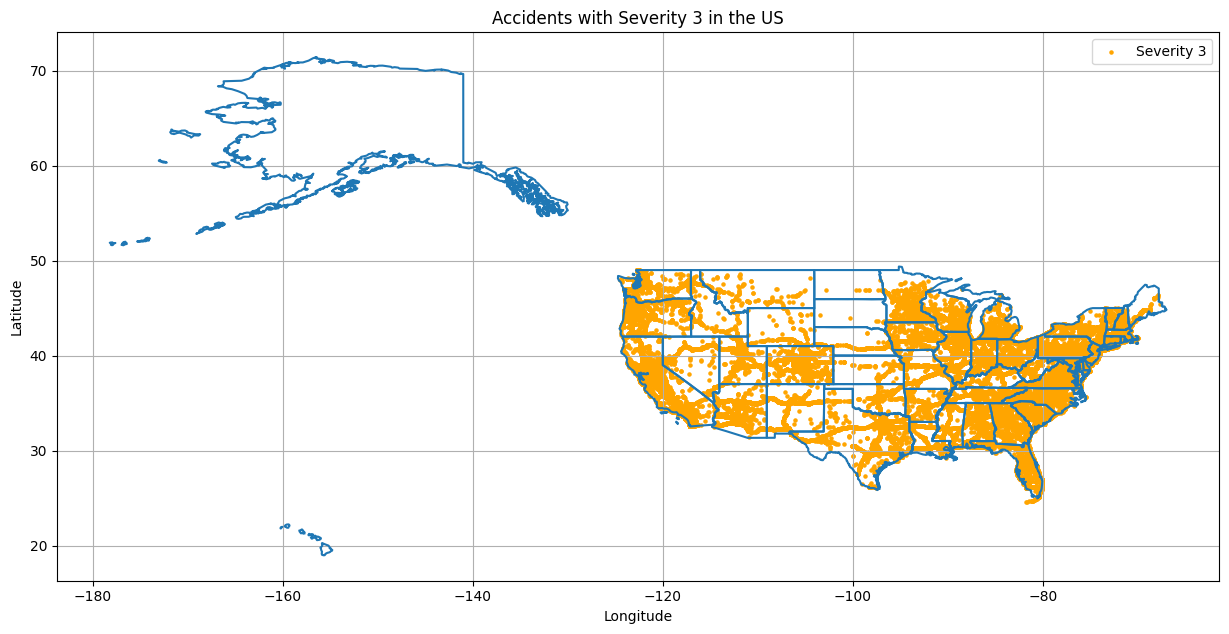

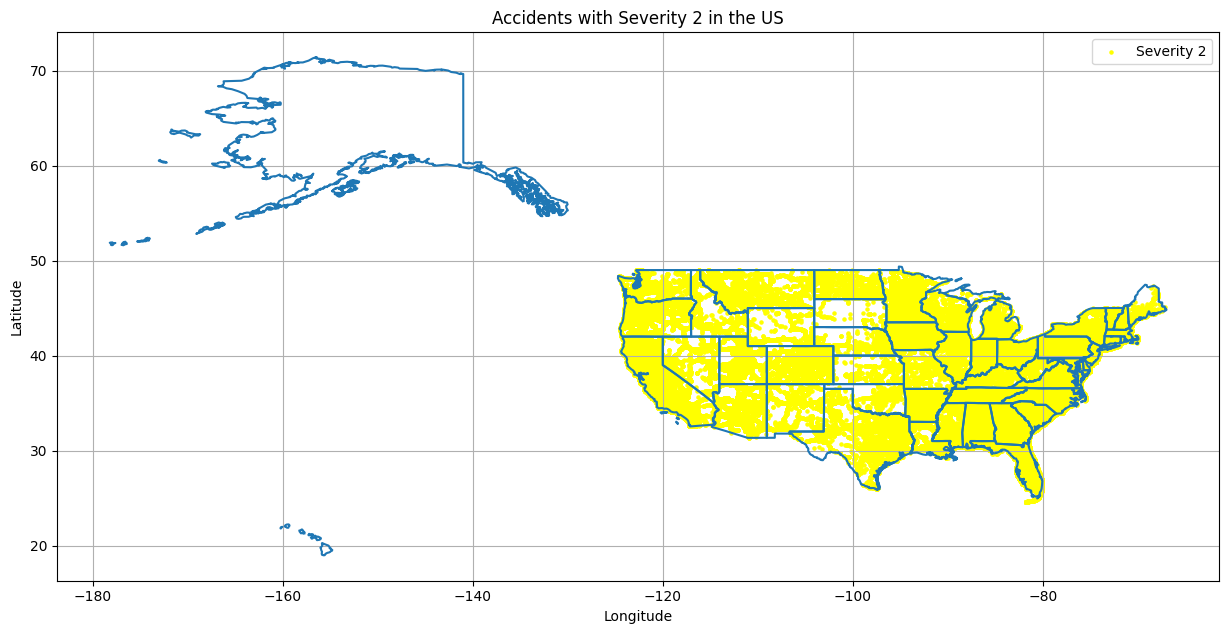

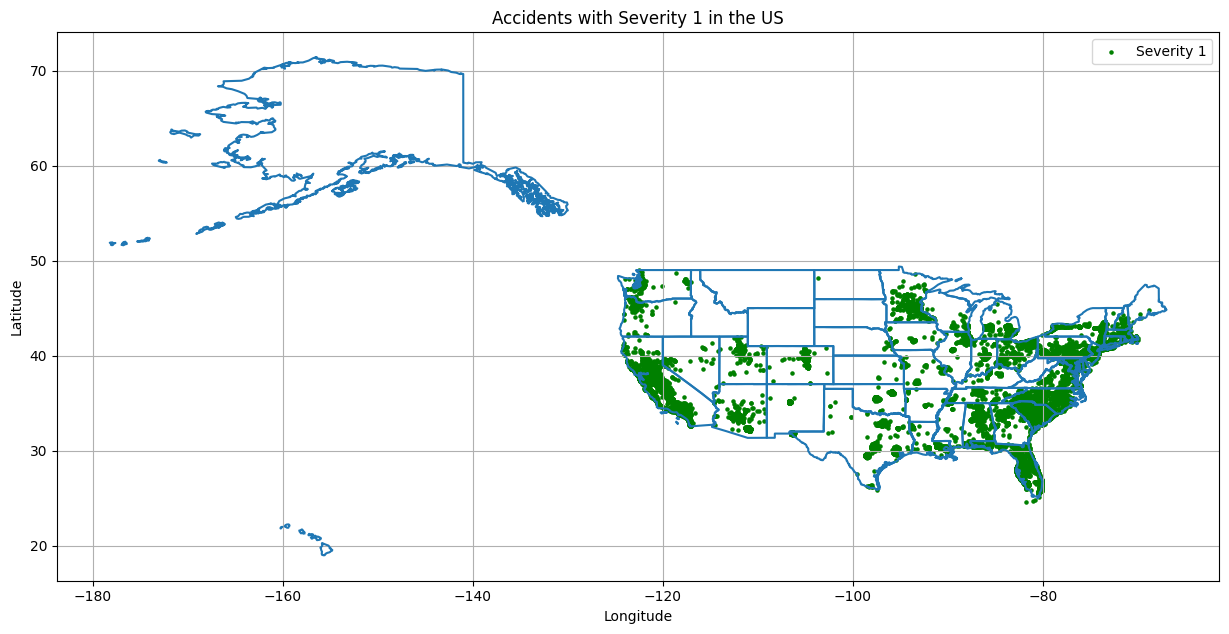

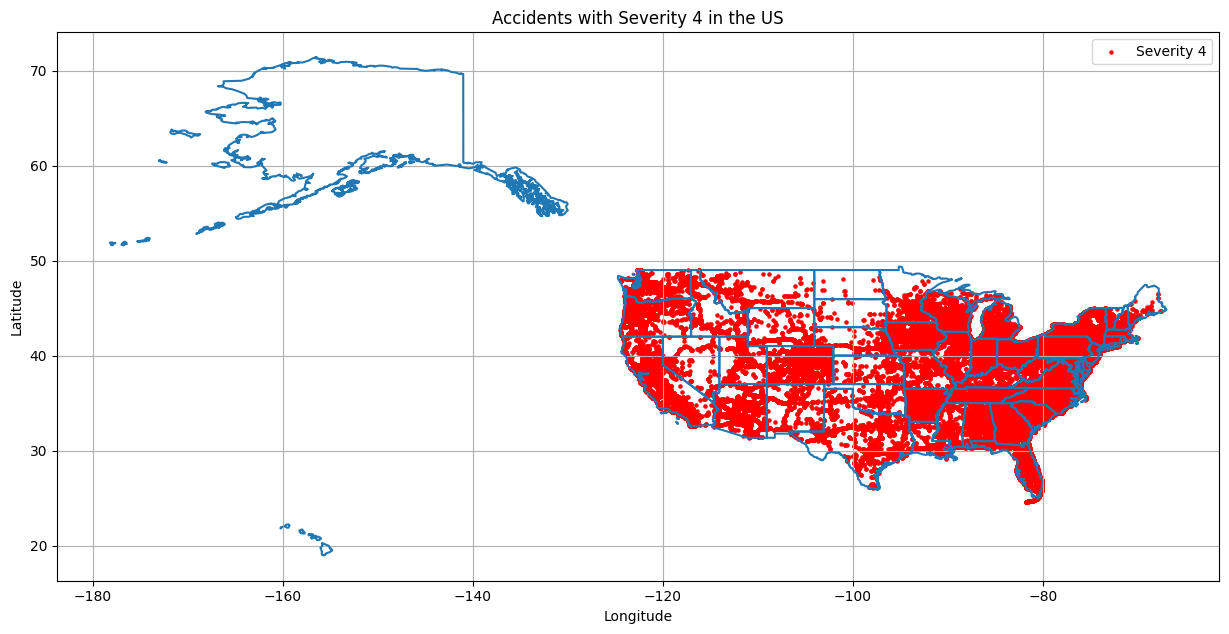

In [18]:
# import geopandas as gpd
# import fiona
# import matplotlib.pyplot as plt
# import pandas as pd

# Assuming df_accidents_dataset is the DataFrame containing the accident data

# Filter the necessary columns
df_severity = df_accidents_dataset[['City', 'Start_Lat', 'Start_Lng', 'Severity']]

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df_severity, geometry=gpd.points_from_xy(df_severity['Start_Lng'], df_severity['Start_Lat']))

# Set the environment variable using Fiona's context
with fiona.Env(SHAPE_RESTORE_SHX='YES'):
    try:
        usa = gpd.read_file(r'C:\Users\arcad\Labs_term2\States_shapefile.shp')
    except Exception as e:
        print(f"Error reading shapefile: {e}")

# Plotting each severity level separately
severity_colors = {1: 'green', 2: 'yellow', 3: 'orange', 4: 'red'}

for severity in gdf['Severity'].unique():
    fig, ax = plt.subplots(figsize=(15, 10))
    usa.boundary.plot(ax=ax)  # Plot USA boundaries
    gdf[gdf['Severity'] == severity].plot(ax=ax, color=severity_colors[severity], markersize=5, label=f'Severity {severity}')
    
    # Adding title and legend
    plt.title(f'Accidents with Severity {severity} in the US')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.legend()
    plt.show()


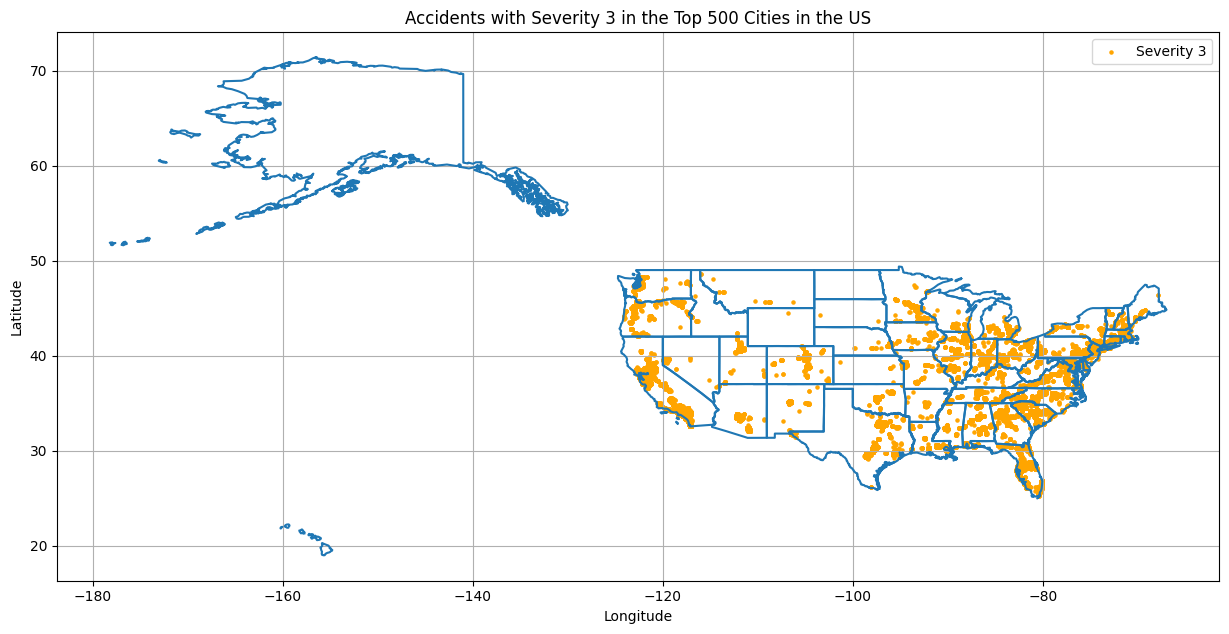

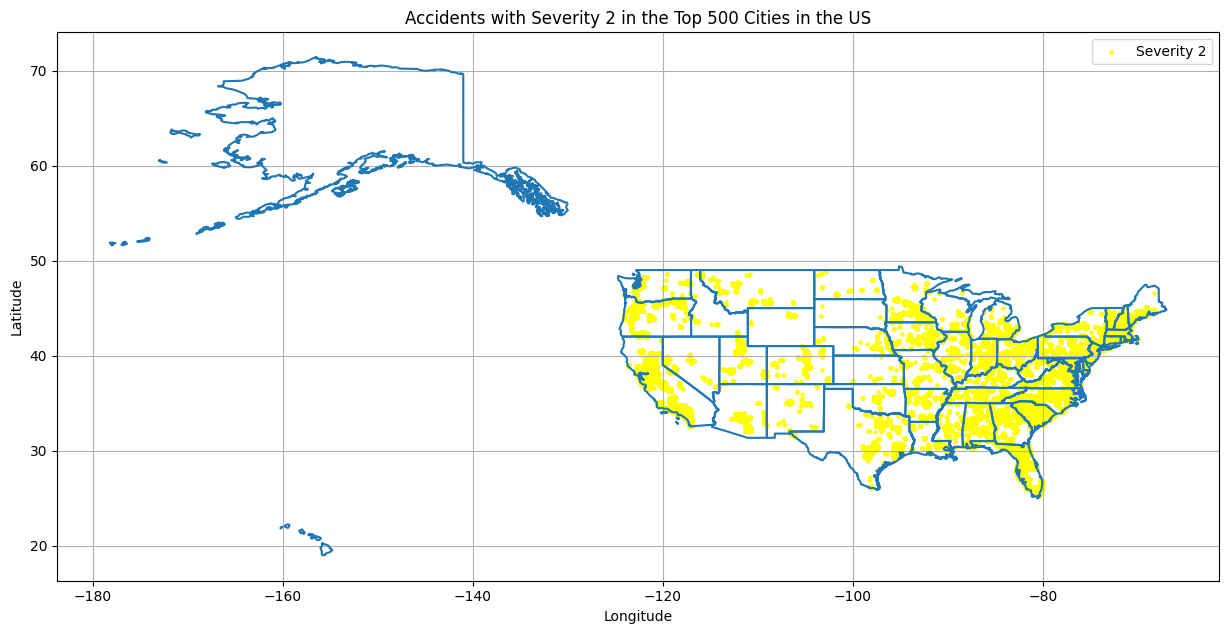

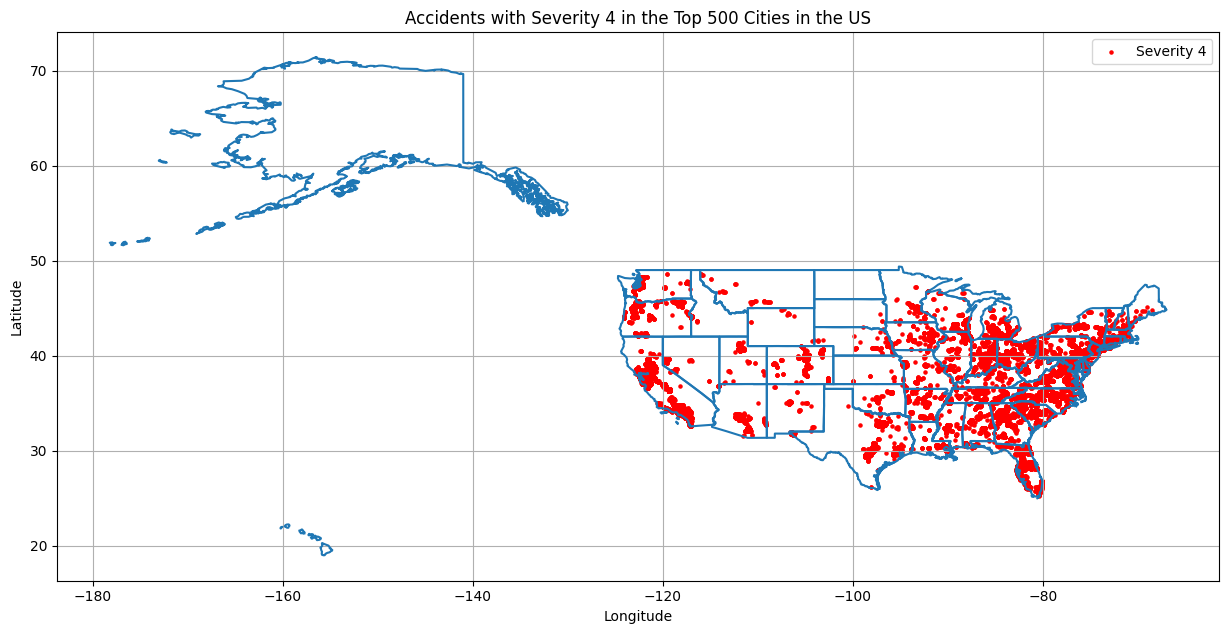

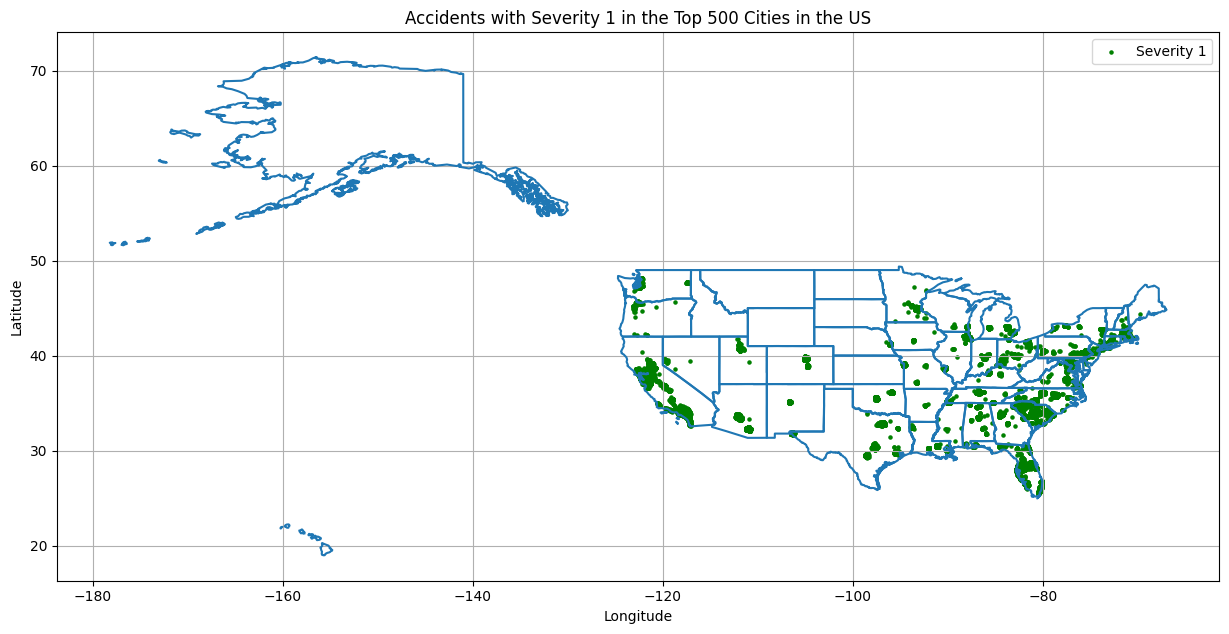

In [19]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_accidents_dataset is the DataFrame containing the accident data

# Filter the necessary columns
df_severity = df_accidents_dataset[['City', 'Start_Lat', 'Start_Lng', 'Severity']]

# Get the top 500 cities with the highest number of accidents
top_500_cities = df_severity['City'].value_counts().nlargest(500).index
df_top_500 = df_severity[df_severity['City'].isin(top_500_cities)]

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df_top_500, geometry=gpd.points_from_xy(df_top_500['Start_Lng'], df_top_500['Start_Lat']))

# Set the environment variable using Fiona's context
with fiona.Env(SHAPE_RESTORE_SHX='YES'):
    try:
        usa = gpd.read_file(r'C:\Users\arcad\Labs_term2\States_shapefile.shp')
    except Exception as e:
        print(f"Error reading shapefile: {e}")

# Plotting each severity level separately
severity_colors = {1: 'green', 2: 'yellow', 3: 'orange', 4: 'red'}

for severity in gdf['Severity'].unique():
    fig, ax = plt.subplots(figsize=(15, 10))
    usa.boundary.plot(ax=ax)  # Plot USA boundaries
    gdf[gdf['Severity'] == severity].plot(ax=ax, color=severity_colors[severity], markersize=5, label=f'Severity {severity}')
    
    # Adding title and legend
    plt.title(f'Accidents with Severity {severity} in the Top 500 Cities in the US')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.legend()
    plt.show()


# 3. Data Preprocessing

- ID: T0003 - Task: Check for missing values in the dataset and decide on strategies to handle them such as imputation or removal.
- ID: T0004 - Task: Encode categorical variables into numerical format using techniques like one-hot encoding or label encoding.


## 3.1. Drop some unneeded columns in the dataset
'ID' doesn't provide any useful information about accidents.  'Distance(mi)' can be collected only after the accident has already happened and hence cannot be used for serious accident prediction. For 'Description', the POI features have already been extracted from it by dataset creators. 
Number, Street, County, State, Zipcode, Country: we just focus on the City where the accident happened
Timezone, Airport_Code, Weather_Timestamp: not usefull information

In [21]:
df_accidents_dataset = df_accidents_dataset[df_accidents_dataset['Source'] == 'Source1']

In [22]:
# Drop some useless features

df_accidents_dataset = df_accidents_dataset.drop(['ID','Source','Description','Distance(mi)', 'End_Time', 
              'End_Lat', 'End_Lng'], axis=1)

## 3.2. Drop duplicates in the dataset

In [23]:
print("Number of rows:", len(df_accidents_dataset.index))
df_accidents_dataset.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df_accidents_dataset.index))

Number of rows: 4325632
Number of rows after drop of duplicates: 3960160


## 3.3. Handle duplicate values in columns

In [24]:
print("Wind Direction: ", df_accidents_dataset['Wind_Direction'].unique())

Wind Direction:  ['SW' 'Calm' 'WSW' 'WNW' 'West' 'NNW' 'South' 'W' 'NW' 'North' 'SSE' 'SSW'
 'ESE' 'SE' nan 'East' 'Variable' 'NNE' 'NE' 'ENE' 'CALM' 'S' 'VAR' 'N'
 'E']


In [25]:
df_accidents_dataset.loc[df_accidents_dataset['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df_accidents_dataset.loc[(df_accidents_dataset['Wind_Direction']=='West')|(df_accidents_dataset['Wind_Direction']=='WSW')|(df_accidents_dataset['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df_accidents_dataset.loc[(df_accidents_dataset['Wind_Direction']=='South')|(df_accidents_dataset['Wind_Direction']=='SSW')|(df_accidents_dataset['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df_accidents_dataset.loc[(df_accidents_dataset['Wind_Direction']=='North')|(df_accidents_dataset['Wind_Direction']=='NNW')|(df_accidents_dataset['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df_accidents_dataset.loc[(df_accidents_dataset['Wind_Direction']=='East')|(df_accidents_dataset['Wind_Direction']=='ESE')|(df_accidents_dataset['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df_accidents_dataset.loc[df_accidents_dataset['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after duplicate removal: ", df_accidents_dataset['Wind_Direction'].unique())

Wind Direction after duplicate removal:  ['SW' 'CALM' 'W' 'N' 'S' 'NW' 'E' 'SE' nan 'VAR' 'NE']


In [26]:
print(df_accidents_dataset["Weather_Condition"].unique())

['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Light Rain / Windy' 'Widespread Dust'
 'Mostly Cloudy / Windy' 'Blowing Dust / Windy' 'Blowing Dust'
 'Volcanic Ash' 'Freezing Rain / Windy' 'Small Hail' 'W

In [27]:
df_accidents_dataset.loc[df_accidents_dataset["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df_accidents_dataset.loc[df_accidents_dataset["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df_accidents_dataset.loc[df_accidents_dataset["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df_accidents_dataset.loc[df_accidents_dataset["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df_accidents_dataset.loc[df_accidents_dataset["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df_accidents_dataset.loc[df_accidents_dataset["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df_accidents_dataset.loc[df_accidents_dataset["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df_accidents_dataset.loc[df_accidents_dataset["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df_accidents_dataset.loc[df_accidents_dataset["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df_accidents_dataset.loc[df_accidents_dataset["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df_accidents_dataset.loc[df_accidents_dataset["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(df_accidents_dataset["Weather_Condition"].unique())

['Rain' 'Cloudy' 'Snow' nan 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


In [28]:
df_accidents_dataset = df_accidents_dataset.drop(['Country','Turning_Loop','Weather_Timestamp'], axis=1)

## 3.4. Check for missing values in the dataset

In [29]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Display the total number of missing values per column
missing_values = df_accidents_dataset.isnull().sum()
print(missing_values)



Severity                      0
Start_Time                    0
Start_Lat                     0
Start_Lng                     0
Street                     8285
City                        178
County                        0
State                         0
Zipcode                    1401
Timezone                   4707
Airport_Code              15051
Temperature(F)            97138
Wind_Chill(F)            519487
Humidity(%)              102897
Pressure(in)              83628
Visibility(mi)           102143
Wind_Direction           109720
Wind_Speed(mph)          195827
Precipitation(in)        602707
Weather_Condition        101902
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_

In [30]:
missing = pd.DataFrame(df_accidents_dataset.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df_accidents_dataset.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

Feature  Missing_Percent(%)
4                  Street            0.209209
5                    City            0.004495
8                 Zipcode            0.035377
9                Timezone            0.118859
10           Airport_Code            0.380060
11         Temperature(F)            2.452881
12          Wind_Chill(F)           13.117829
13            Humidity(%)            2.598304
14           Pressure(in)            2.111733
15         Visibility(mi)            2.579264
16         Wind_Direction            2.770595
17        Wind_Speed(mph)            4.944926
18      Precipitation(in)           15.219259
19      Weather_Condition            2.573179
32         Sunrise_Sunset            0.499500
33         Civil_Twilight            0.499500
34      Nautical_Twilight            0.499500
35  Astronomical_Twilight            0.499500

3.1.1. Columns with a High Number of Missing Values: 
End_Lat and End_Lng: These columns have approximately 44% missing values. So, we will drop these columns.
Wind_Chill(F): These columns have many missing values. So, we will also drop these columns.

Precipitation(in) : we will keep it as 'Precipitation(in)' could be a useful predictor 

3.1.2. Columns with Moderate Missing Values:
Description, Street, City, Zipcode, Airport_Code, Weather_Timestamp are not important predictors so, we can remove that. Temperature(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Weather_Condition: For these columns, we will impute missing values with appropriate statistical measures (mean, median, mode) or using more advanced techniques like K-Nearest Neighbors (KNN) imputation.


3.1.2. Columns with Few Missing Values:
Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight: These columns have a relatively low number of missing values. We will the missing values.

## 3.5. Handling with missing values in the dataset

In [33]:
# Drop columns with high missing values
df_accidents_dataset = df_accidents_dataset.drop(columns='Wind_Chill(F)')

# Impute missing values for numerical columns with mean
numerical_cols = ['Temperature(F)', 'Humidity(%)', 'Precipitation(in)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
for col in numerical_cols:
    df_accidents_dataset[col] = df_accidents_dataset[col].fillna(df_accidents_dataset[col].mean())


# Remove rows with missing values in critical columns
df_accidents_dataset = df_accidents_dataset.dropna(subset=['Street','Weather_Condition', 'Start_Time',
                    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight','Wind_Direction'])


# Verify missing values are handled
print(df_accidents_dataset.isnull().sum())


Severity                    0
Start_Time                  0
Start_Lat                   0
Start_Lng                   0
Street                   7845
City                        0
County                      0
State                       0
Zipcode                     0
Timezone                    0
Airport_Code                0
Temperature(F)              0
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Direction              0
Wind_Speed(mph)             0
Precipitation(in)           0
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Traffic_Calming             0
Traffic_Signal              0
Sunrise_Sunset              0
Civil_Twilight              0
Nautical_T

In [40]:
df_accidents_dataset= df_accidents_dataset.drop(['Amenity','Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], axis=1)

In [62]:
df_accidents_dataset = df_accidents_dataset.drop(columns=['Street','County','State','Zipcode','Airport_Code'])

## 3.6. Encode categorical variables into numerical format using techniques like one-hot encoding or label encoding.

Encode the boolean values in a numerical form.

In [38]:
df_accidents_dataset = df_accidents_dataset.replace([True, False], [1, 0])

df_accidents_dataset.head()

Severity           Start_Time  Start_Lat  Start_Lng       Street   
3402762         3  2016-02-08 00:37:08   40.10891  -83.09286  Outerbelt E  \
3402763         2  2016-02-08 05:56:20   39.86542  -84.06280       I-70 E   
3402764         2  2016-02-08 06:15:39   39.10266  -84.52468       I-75 S   
3402765         2  2016-02-08 06:15:39   39.10148  -84.52341      US-50 E   
3402766         2  2016-02-08 06:51:45   41.06213  -81.53784       I-77 N   

               City      County State Zipcode    Timezone  ... Railway   
3402762      Dublin    Franklin    OH   43017  US/Eastern  ...       0  \
3402763      Dayton  Montgomery    OH   45424  US/Eastern  ...       0   
3402764  Cincinnati    Hamilton    OH   45203  US/Eastern  ...       0   
3402765  Cincinnati    Hamilton    OH   45202  US/Eastern  ...       0   
3402766       Akron      Summit    OH   44311  US/Eastern  ...       0   

         Roundabout  Station  Stop  Traffic_Calming Traffic_Signal   
3402762           0        0     0                0              0  \
3402763           0        0     0                0              0   
3402764           0        0     0                0              0   
3402765           0        0     0                0              0   
3402766           0        0     0                0              0   

         Sunrise_Sunset  Civil_Twilight Nautical_Twilight   
3402762           Night           Night             Night  \
3402763           Night           Night             Night   
3402764           Night           Night             Night   
3402765           Night           Night             Night   
3402766           Night           Night               Day   

         Astronomical_Twilight  
3402762                  Night  
3402763                  Night  
3402764                    Day  
3402765                    Day  
3402766                    Day  

[5 rows x 35 columns]

In [64]:
{column: len(df_accidents_dataset[column].unique()) for column in df_accidents_dataset.columns if df_accidents_dataset.dtypes[column] == 'object'}

{'City': 11217, 'Timezone': 4, 'Wind_Direction': 10, 'Weather_Condition': 11}

## 3.7 Add Features useful for prediction

In [53]:
# Convert 'Start_Time' and 'End_Time' to datetime
df_accidents_dataset['Start_Time'] = pd.to_datetime(df_accidents_dataset['Start_Time'], format='mixed')

# Create new features
df_accidents_dataset['Start_Year'] = df_accidents_dataset['Start_Time'].dt.year
df_accidents_dataset['Start_Month'] = df_accidents_dataset['Start_Time'].dt.month
df_accidents_dataset['Start_Day'] = df_accidents_dataset['Start_Time'].dt.day
df_accidents_dataset['Start_Hour'] = df_accidents_dataset['Start_Time'].dt.hour
df_accidents_dataset['Start_Minute'] = df_accidents_dataset['Start_Time'].dt.minute

# Drop the original columns
df_accidents_dataset = df_accidents_dataset.drop(columns=['Start_Time'])

In [56]:
cat_columns = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [59]:
for column in cat_columns:
    df_accidents_dataset[column] = df_accidents_dataset[column].apply(lambda x: 1 if x == 'Day' else 0)

In [ ]:
from scipy.sparse import hstack
categorical_columns_one_hot = ['Wind_Direction','Weather_Condition','Timezone']

def one_hot_encode_sparse(df, columns):
    df = df.copy()
    sparse_matrices = []
    for column in columns:
        dummies = pd.get_dummies(df[column], sparse=True)
        sparse_matrices.append(csr_matrix(dummies))
        df = df.drop(column, axis=1)
    sparse_combined = hstack(sparse_matrices)
    df_sparse_encoded = pd.DataFrame.sparse.from_spmatrix(sparse_combined)
    df.reset_index(drop=True, inplace=True)
    df_sparse_encoded.reset_index(drop=True, inplace=True)
    df_combined = pd.concat([df, df_sparse_encoded], axis=1)
    return df_combined

df_accidents_sparse_encoded = one_hot_encode_sparse(df_accidents_dataset, categorical_columns_one_hot)



In [66]:
pip install category_encoders

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 330.3 kB/s eta 0:00:01
   ----------------------------------- ---- 71.7/81.9 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 572.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   -------------------------------------- - 225.3/233.9 kB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 233.9/233.9 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------ --------------------------------- 1.7/9.9 MB 35.5 MB/s eta 0:00:01
   ------------------ --------------------- 4.6/9.9 MB 49.3 MB/s eta 0:00:01
   ---------------------------- ----------- 6.9/9.9 MB 55.1 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 57.2 MB/s eta 0:00:01
   --------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


To encode the City feature. In order to, reduce the usage of memory and the number of features we used the BinaryEncoder included in the library category_encoders.

In [87]:
import category_encoders as ce
binary_encoder = ce.binary.BinaryEncoder()

city_binary_enc = binary_encoder.fit_transform(df_accidents_sparse_encoded["City"])
df_accidents_sparse_encoded = pd.concat([df_accidents_sparse_encoded, city_binary_enc], axis=1).drop("City", axis=1)

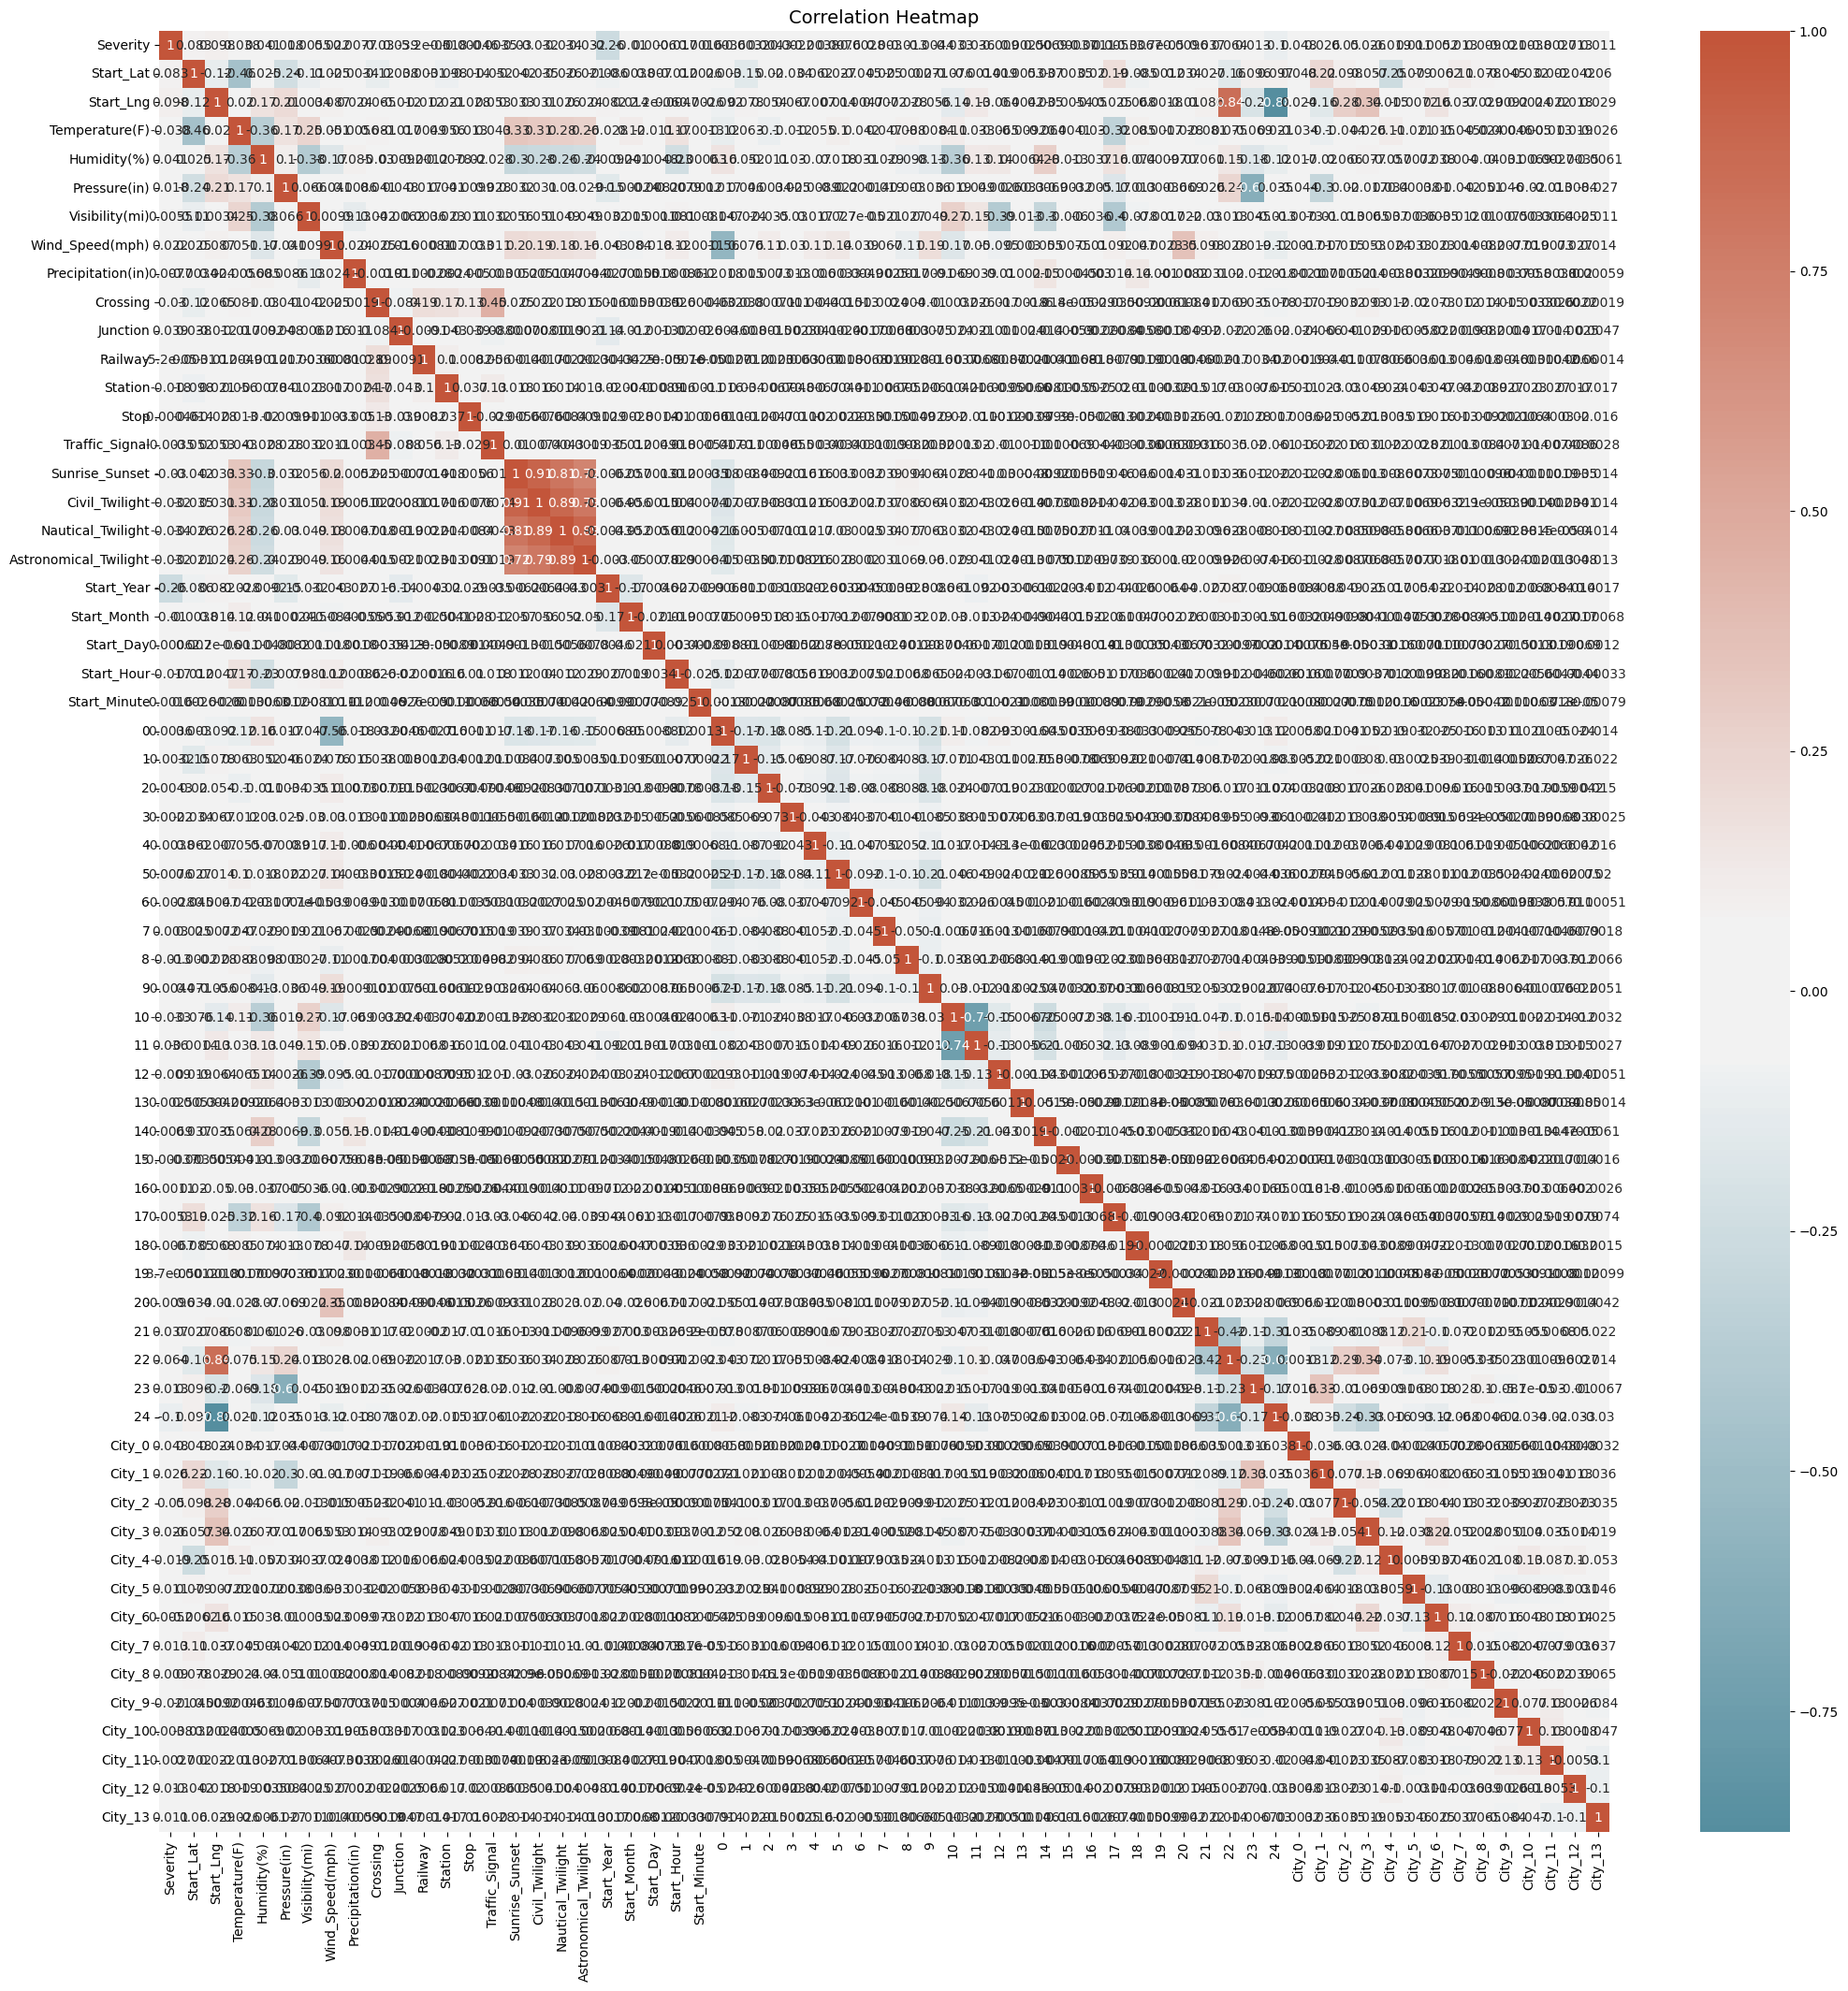

In [89]:
# Calculate correlation matrix
plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_accidents_sparse_encoded.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

## 3.7  Scale and normalize the features

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [91]:
# Select columns and apply scaling
numeric_cols = ['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Start_Year', 'Start_Month','Start_Day','Start_Hour','Start_Minute']


In [92]:
df_accidents_sparse_encoded[numeric_cols] = scaler.fit_transform(df_accidents_sparse_encoded[numeric_cols])


Severity  Start_Lat  Start_Lng  Temperature(F)  Humidity(%)  Pressure(in)   
0         3   0.636103   0.721777        0.442905     0.575758      0.507590  \
1         2   0.626138   0.704890        0.425338     0.909091      0.506225   
2         2   0.594921   0.696848        0.422297     0.969697      0.506567   
3         2   0.594873   0.696870        0.422297     0.969697      0.506567   
4         2   0.675114   0.748852        0.432432     0.545455      0.505714   

   Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  Crossing  ...  City_4   
0        0.071429         0.009568           0.000000         0  ...       0  \
1        0.071429         0.006957           0.000833         0  ...       0   
2        0.071429         0.006957           0.000833         0  ...       0   
3        0.071429         0.006957           0.000833         0  ...       0   
4        0.071429         0.006957           0.000274         0  ...       0   

   City_5  City_6  City_7  City_8  City_9  City_10  City_11  City_12  City_13  
0       0       0       0       0       0        0        0        0        1  
1       0       0       0       0       0        0        0        1        0  
2       0       0       0       0       0        0        0        1        1  
3       0       0       0       0       0        0        0        1        1  
4       0       0       0       0       0        0        1        0        0  

[5 rows x 63 columns]

In [93]:
df_accidents_sparse_encoded

Severity  Start_Lat  Start_Lng  Temperature(F)  Humidity(%)   
0               3   0.636103   0.721777        0.442905     0.575758  \
1               2   0.626138   0.704890        0.425338     0.909091   
2               2   0.594921   0.696848        0.422297     0.969697   
3               2   0.594873   0.696870        0.422297     0.969697   
4               2   0.675114   0.748852        0.432432     0.545455   
...           ...        ...        ...             ...          ...   
3806259         2   0.386193   0.124815        0.591216     0.393939   
3806260         2   0.335629   0.128842        0.537162     0.727273   
3806261         2   0.376902   0.116659        0.547297     0.636364   
3806262         2   0.385783   0.106992        0.540541     0.808081   
3806263         2   0.391573   0.127399        0.567568     0.464646   

         Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)   
0            0.507590        0.071429         0.009568           0.000000  \
1            0.506225        0.071429         0.006957           0.000833   
2            0.506567        0.071429         0.006957           0.000833   
3            0.506567        0.071429         0.006957           0.000833   
4            0.505714        0.071429         0.006957           0.000274   
...               ...             ...              ...                ...   
3806259      0.493263        0.071429         0.011960           0.000000   
3806260      0.501279        0.071429         0.005520           0.000000   
3806261      0.507249        0.071429         0.009200           0.000000   
3806262      0.505202        0.071429         0.007360           0.000000   
3806263      0.488317        0.050000         0.006440           0.000000   

         Crossing  ...  City_4  City_5  City_6  City_7  City_8  City_9   
0               0  ...       0       0       0       0       0       0  \
1               0  ...       0       0       0       0       0       0   
2               0  ...       0       0       0       0       0       0   
3               0  ...       0       0       0       0       0       0   
4               0  ...       0       0       0       0       0       0   
...           ...  ...     ...     ...     ...     ...     ...     ...   
3806259         0  ...       1       0       0       0       1       0   
3806260         0  ...       1       0       0       0       0       1   
3806261         0  ...       1       0       0       1       0       0   
3806262         0  ...       1       0       0       0       1       0   
3806263         0  ...       1       0       0       1       1       0   

         City_10  City_11  City_12  City_13  
0              0        0        0        1  
1              0        0        1        0  
2              0        0        1        1  
3              0        0        1        1  
4              0        1        0        0  
...          ...      ...      ...      ...  
3806259        0        0        1        1  
3806260        1        1        1        0  
3806261        0        0        1        0  
3806262        1        0        0        1  
3806263        1        1        1        0  

[3806264 rows x 63 columns]

In [39]:
df_accidents_dataset.Severity.value_counts()

Severity
2    3455874
4     174038
3     151456
1      24896
Name: count, dtype: int64

## Splitting the Dataset

In [94]:
X = df_accidents_sparse_encoded.drop('Severity', axis=1)  # Features
y = df_accidents_sparse_encoded['Severity']  # Target variable

In [101]:
X.columns = X.columns.astype(str)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
X_train.shape

(3045011, 62)

In [104]:
X_test.shape

(761253, 62)

## Model Training

In [105]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [106]:
model.fit(X_train, y_train)

c:\Users\hemas\Documents\Applied_AI_and_ML_Courses\Foundations_Of_ML\labs\CSCN8010\venv\CSCN8010_classic_ml3\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestClassifier(random_state=42)

## Saving the Model

In [107]:
import joblib

In [108]:
joblib.dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

## Model Evaluation

In [110]:
y_pred = model.predict(X_test)

c:\Users\hemas\Documents\Applied_AI_and_ML_Courses\Foundations_Of_ML\labs\CSCN8010\venv\CSCN8010_classic_ml3\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [119]:
target_names = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']
report1 = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)

In [138]:
# Convert classification report to DataFrame
df_report = pd.DataFrame(report1).transpose()

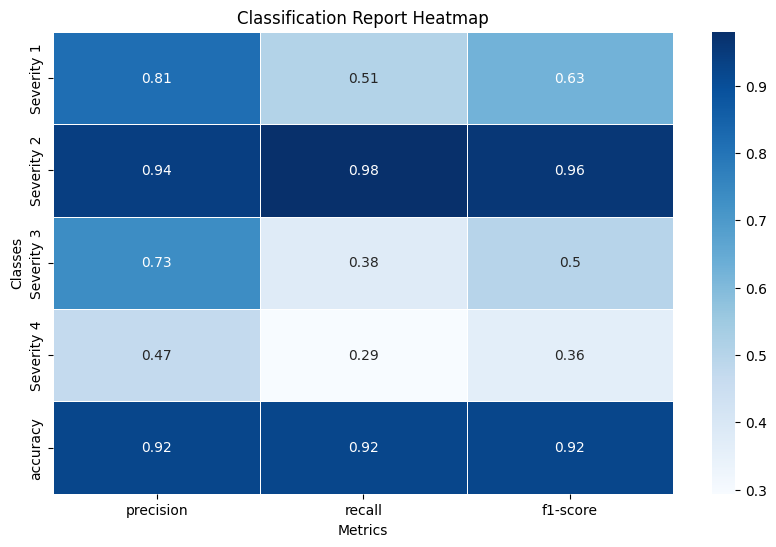

In [139]:

df_report = df_report.loc[['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4', 'accuracy'], 
                          ['precision', 'recall', 'f1-score', 'support']]

# Plotting the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:, :-1], annot=True, cmap='Blues', linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

## Handling Class Imbalance by training a Model by assigning Higher weights to minority class

In [123]:
model2 = RandomForestClassifier(class_weight={1: 1, 2: 1, 3: 1, 4: 10}, random_state=42)
model2.fit(X_train, y_train)

c:\Users\hemas\Documents\Applied_AI_and_ML_Courses\Foundations_Of_ML\labs\CSCN8010\venv\CSCN8010_classic_ml3\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestClassifier(class_weight={1: 1, 2: 1, 3: 1, 4: 10}, random_state=42)

In [124]:
joblib.dump(model2, 'rf_model_classweights.joblib')

['rf_model_classweights.joblib']

In [125]:
y_pred_cw = model2.predict(X_test)

c:\Users\hemas\Documents\Applied_AI_and_ML_Courses\Foundations_Of_ML\labs\CSCN8010\venv\CSCN8010_classic_ml3\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [126]:
report = classification_report(y_test, y_pred_cw, target_names=target_names,output_dict = True)

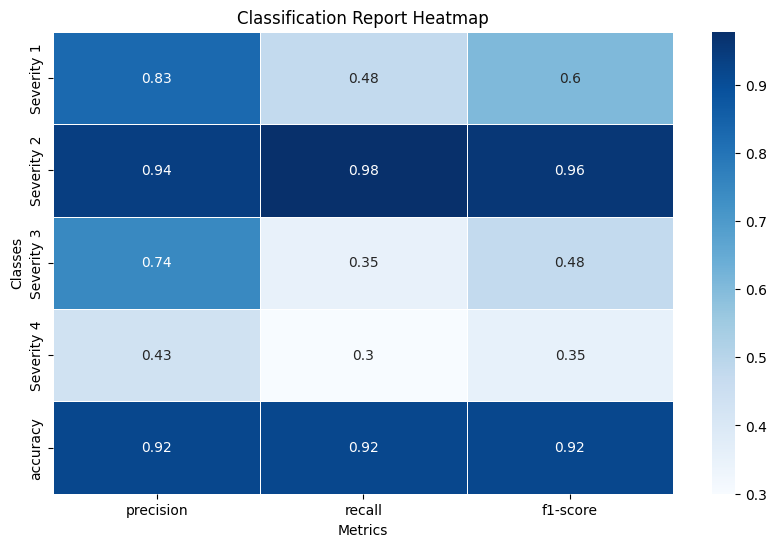

In [136]:
# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

report_df = report_df.loc[['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4', 'accuracy'], 
                          ['precision', 'recall', 'f1-score', 'support']]

# Plotting the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='Blues', linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()